In [ ]:
!pip install GeoPandas

In [ ]:

%matplotlib inline

import pandas as pd
import geopandas

In [ ]:
!pip install contextily

In [ ]:
import contextily as ctx
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano

In [ ]:
CorsiAcqua = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Corsi_acqua_Piano_di_Gestione/Corsi_acqua_Piano_di_Gestione.dbf')
CorsiAcqua

,OBJECTID,COD_PTUA16,NATURA,REGIONE,NOME,SOTTOBACIN,TIPOLOGIA,A_PROTETTA,SENSIBILE,VULNERABIL,D_HABITAT,D_UCCELLI,RAMSAR,BALNEAZION,VITA_PESCI,USO_POTAB,AREE_A_PR,BACINO,RAGG_ECO,RAGG_CHI,STATO_ECO,CONF_ECO,STATO_CHI,CONF_CHI,ANNI_CHI,ANNI_ECO,OBB_CHI,OBB_ECO,ESENZIONI,SHAPE_LEN,geometry
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627..."
1,191,IT03POTI3SNCA1LO,artificiale,Lombardia,Scolmatore Piene Nord - Ovest (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,scarso,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,34035.857991,"MULTILINESTRING ((494060.091 5029696.046, 4940..."
2,215,IT03N0080447LO,naturale,Lombardia,Lambro (Fiume),Lambro (Asta),06SS4N,sì,sì,sì,no,sì,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,21811.145089,"MULTILINESTRING ((536963.747 5005395.412, 5369..."
3,252,IT03N008044003021LO,naturale,Lombardia,Garbogera (Torrente),Lambro (Asta),06IN7N,sì,no,sì,sì,no,no,no,no,no,sì,LAMBRO - OLONA MERIDIONALE,sì,sì,scarso,media,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,19767.119220,"LINESTRING (509280.513 5047845.024, 509281.795..."
4,255,IT03N0080440441LO,naturale,Lombardia,Sillaro Salerano,Lambro (Asta),06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,13180.757122,"LINESTRING (528977.056 5024109.798, 528981.181..."
5,256,IT03N0080440701LO,naturale,Lombardia,Addetta (Colatore),Lambro (Asta),06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,media,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,9403.459186,"MULTILINESTRING ((530299.337 5029522.740, 5302..."
6,282,IT03POLSRECA1LO,artificiale,Lombardia,Redefossi (Cavo),nd,06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,18403.681560,"LINESTRING (514894.561 5036362.164, 514898.993..."
7,65,ITIRN0080984IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,no,sì,TICINO,no,no,sufficiente,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,38206.257375,"MULTILINESTRING ((483579.882 5034726.498, 4835..."
8,66,ITIRN0080982IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,sì,sì,TICINO,no,no,buono,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,mantenimento dello stato buono,Nessuna proroga o deroga,35927.352062,"MULTILINESTRING ((477067.969 5044605.066, 4770..."
9,67,ITIRN0080983IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,no,sì,TICINO,no,no,buono,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,mantenimento dello stato buono,Nessuna proroga o deroga,17917.785813,"MULTILINESTRING ((477477.600 5043097.081, 4774..."


In [ ]:
province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g')

In [ ]:
Milano = province[province.DEN_UTS == 'Milano']

In [ ]:
CorsiMi = CorsiAcqua[CorsiAcqua.intersects(Milano.geometry.squeeze())]
CorsiMi

,OBJECTID,COD_PTUA16,NATURA,REGIONE,NOME,SOTTOBACIN,TIPOLOGIA,A_PROTETTA,SENSIBILE,VULNERABIL,D_HABITAT,D_UCCELLI,RAMSAR,BALNEAZION,VITA_PESCI,USO_POTAB,AREE_A_PR,BACINO,RAGG_ECO,RAGG_CHI,STATO_ECO,CONF_ECO,STATO_CHI,CONF_CHI,ANNI_CHI,ANNI_ECO,OBB_CHI,OBB_ECO,ESENZIONI,SHAPE_LEN,geometry
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627..."
1,191,IT03POTI3SNCA1LO,artificiale,Lombardia,Scolmatore Piene Nord - Ovest (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,scarso,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,34035.857991,"MULTILINESTRING ((494060.091 5029696.046, 4940..."
2,215,IT03N0080447LO,naturale,Lombardia,Lambro (Fiume),Lambro (Asta),06SS4N,sì,sì,sì,no,sì,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,21811.145089,"MULTILINESTRING ((536963.747 5005395.412, 5369..."
3,252,IT03N008044003021LO,naturale,Lombardia,Garbogera (Torrente),Lambro (Asta),06IN7N,sì,no,sì,sì,no,no,no,no,no,sì,LAMBRO - OLONA MERIDIONALE,sì,sì,scarso,media,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,19767.119220,"LINESTRING (509280.513 5047845.024, 509281.795..."
4,255,IT03N0080440441LO,naturale,Lombardia,Sillaro Salerano,Lambro (Asta),06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,13180.757122,"LINESTRING (528977.056 5024109.798, 528981.181..."
5,256,IT03N0080440701LO,naturale,Lombardia,Addetta (Colatore),Lambro (Asta),06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,media,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,9403.459186,"MULTILINESTRING ((530299.337 5029522.740, 5302..."
6,282,IT03POLSRECA1LO,artificiale,Lombardia,Redefossi (Cavo),nd,06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,18403.681560,"LINESTRING (514894.561 5036362.164, 514898.993..."
7,65,ITIRN0080984IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,no,sì,TICINO,no,no,sufficiente,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,38206.257375,"MULTILINESTRING ((483579.882 5034726.498, 4835..."
8,66,ITIRN0080982IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,sì,sì,TICINO,no,no,buono,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,mantenimento dello stato buono,Nessuna proroga o deroga,35927.352062,"MULTILINESTRING ((477067.969 5044605.066, 4770..."
9,67,ITIRN0080983IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,no,sì,TICINO,no,no,buono,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,mantenimento dello stato buono,Nessuna proroga o deroga,17917.785813,"MULTILINESTRING ((477477.600 5043097.081, 4774..."


In [ ]:
CorsiMi.sort_values('SHAPE_LEN',ascending = False).head(10)

,OBJECTID,COD_PTUA16,NATURA,REGIONE,NOME,SOTTOBACIN,TIPOLOGIA,A_PROTETTA,SENSIBILE,VULNERABIL,D_HABITAT,D_UCCELLI,RAMSAR,BALNEAZION,VITA_PESCI,USO_POTAB,AREE_A_PR,BACINO,RAGG_ECO,RAGG_CHI,STATO_ECO,CONF_ECO,STATO_CHI,CONF_CHI,ANNI_CHI,ANNI_ECO,OBB_CHI,OBB_ECO,ESENZIONI,SHAPE_LEN,geometry
18,124,IT03POTI3VICA1LO,artificiale,Lombardia,Villoresi (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,bassa,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,86549.137958,"MULTILINESTRING ((478097.612 5045956.958, 4780..."
36,593,IT03N00800112LO,naturale,Lombardia,Adda (Fiume),Adda Sub Lacuale (Asta),06GL3N,sì,sì,sì,sì,no,no,no,sì,no,sì,ADDA,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,61066.374854,"MULTILINESTRING ((541297.507 5041518.075, 5412..."
10,84,IT03POAD3MUCA1LO,artificiale,Lombardia,Muzza (Colatore),nd,None,sì,no,sì,no,no,no,no,no,no,sì,ADDA,no,no,sufficiente,bassa,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,60521.688952,"MULTILINESTRING ((541297.507 5041518.075, 5412..."
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627..."
7,65,ITIRN0080984IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,no,sì,TICINO,no,no,sufficiente,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,38206.257375,"MULTILINESTRING ((483579.882 5034726.498, 4835..."
31,501,IT03POLSSEMACA1LO,artificiale,Lombardia,Naviglio Martesana (Canale),nd,None,sì,no,sì,no,no,no,no,no,no,sì,LAMBRO - OLONA MERIDIONALE,no,no,scarso,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,38123.487110,"LINESTRING (541227.887 5050214.931, 541227.203..."
26,357,IT03N008044002012LO,naturale,Lombardia,Olona (Fiume),Olona,06SS2D,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,cattivo,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,36885.391167,"MULTILINESTRING ((495438.399 5047188.843, 4954..."
8,66,ITIRN0080982IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,sì,sì,TICINO,no,no,buono,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,mantenimento dello stato buono,Nessuna proroga o deroga,35927.352062,"MULTILINESTRING ((477067.969 5044605.066, 4770..."
15,112,IT03N0080440022LO,naturale,Lombardia,Lambro Meridionale (Colatore),Lambro (Asta),06SS3D,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,35449.017426,"MULTILINESTRING ((516227.432 5021570.890, 5162..."
1,191,IT03POTI3SNCA1LO,artificiale,Lombardia,Scolmatore Piene Nord - Ovest (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,scarso,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,34035.857991,"MULTILINESTRING ((494060.091 5029696.046, 4940..."


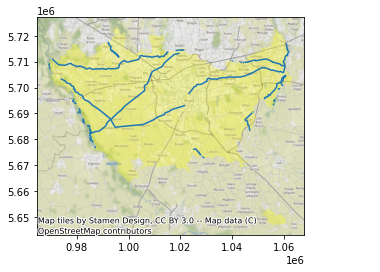

In [ ]:
ax = CorsiMi.sort_values('SHAPE_LEN',ascending = False).head(10).to_crs(epsg=3857).plot()
Milano.to_crs(epsg = 3857).plot(ax=ax,facecolor='Yellow',alpha=0.3)
ctx.add_basemap(ax)

# 2. visualizzi su una mappa i Navigli e i fiumi da cui prendono l'acqua. Utilizzare colori diversi per rappresentare i navigli rispetto ai fiumi ed evidenziare bene i percorsi sulla mappa

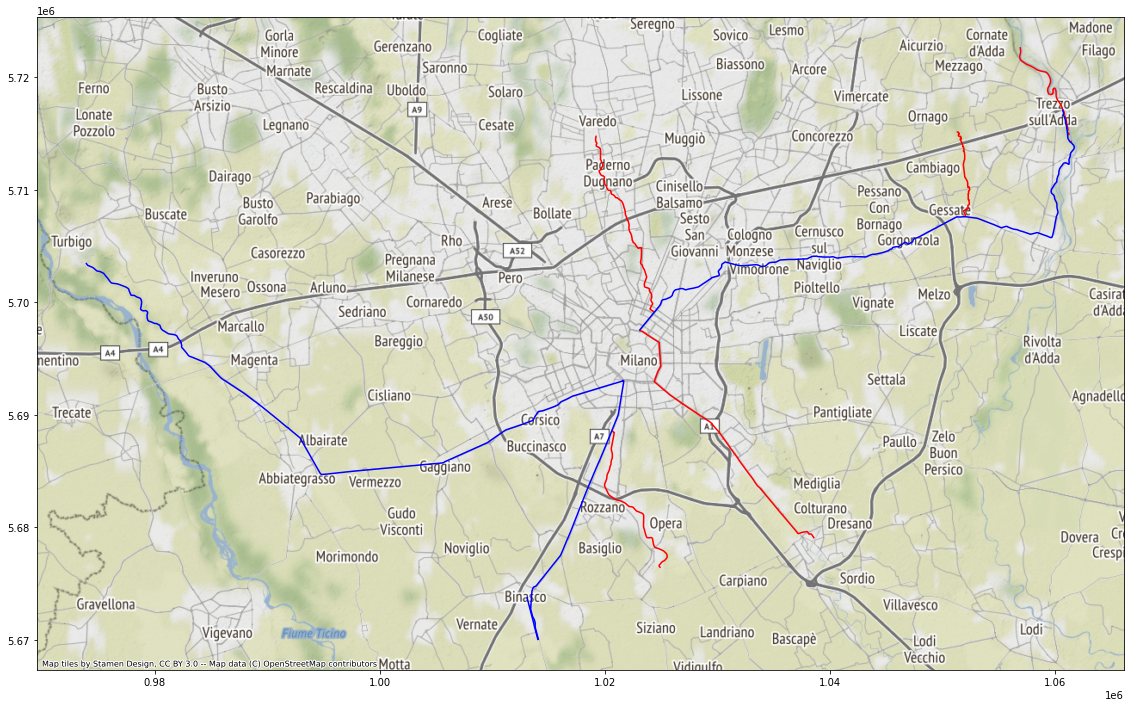

In [ ]:
 Navigli = CorsiMi[CorsiMi['NOME'].str.contains('Navigli')]
Fiumi= CorsiMi[CorsiMi.touches(Navigli.unary_union)]
ax = Fiumi.to_crs(epsg=3857).plot(figsize=(20,12), color='Red')
Navigli.to_crs(epsg=3857).plot(ax=ax, color='Blue')
ctx.add_basemap(ax)

# 3. visualizzi su una mappa i corsi d'acqua che passano in un comune inserito dall'utente

In [ ]:
Comuni =geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g/Com01012021_g_WGS84.dbf')
Comuni

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,1001,001001,AgliÃ¨,None,0,16097.848297,1.330696e+07,"POLYGON ((404703.558 5026682.655, 405359.554 5..."
1,1,1,1,201,201,1002,001002,Airasca,None,0,16684.218599,1.595353e+07,"POLYGON ((380700.909 4977305.520, 381105.998 4..."
2,1,1,1,201,201,1003,001003,Ala di Stura,None,0,29892.674582,4.575189e+07,"POLYGON ((364710.857 5022090.678, 364737.794 5..."
3,1,1,1,201,201,1004,001004,Albiano d'Ivrea,None,0,16192.656480,1.103356e+07,"POLYGON ((415942.504 5033304.609, 416079.315 5..."
4,1,1,1,201,201,1006,001006,Almese,None,0,16077.245089,1.771710e+07,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,5,20,111,0,111,111103,111103,Villaputzu,None,0,100515.537851,1.807260e+08,"MULTIPOLYGON (((556602.772 4375162.650, 556598..."
7899,5,20,111,0,111,111104,111104,Villasalto,None,0,58635.095264,1.303933e+08,"POLYGON ((541186.146 4375105.653, 541180.146 4..."
7900,5,20,111,0,111,111105,111105,Villasimius,None,0,49735.818257,5.759282e+07,"MULTIPOLYGON (((546451.098 4325900.553, 546443..."
7901,5,20,111,0,111,111106,111106,Villasor,None,0,53375.684321,8.640693e+07,"POLYGON ((500362.475 4361229.767, 500397.474 4..."


Bresso


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


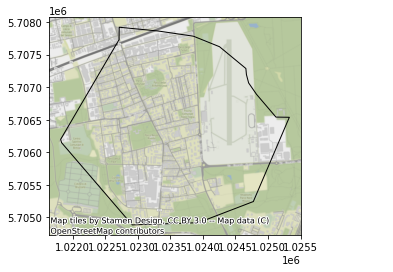

In [ ]:
ComuneInput = input()
ComuneInput = Comuni[Comuni.COMUNE == ComuneInput]
CorsiUtente = CorsiAcqua[CorsiAcqua.intersects(ComuneInput.geometry.squeeze())]
ax = CorsiUtente.to_crs(epsg=3857).plot(color='Blue',edgecolor='k')
ComuneInput.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

# 4. visualizzi su una mappa un fiume inserito dall'utente con tutti i comuni  che attraversa. Se attraversa Milano, visualizzare solo i quartieri che attraversa

In [ ]:
Quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm/NIL_WM.dbf')
Quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


Lambro (Fiume)


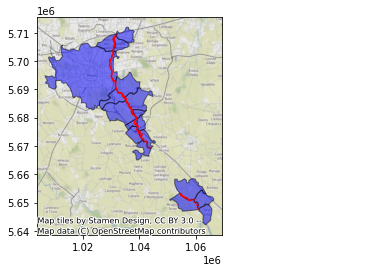

In [ ]:
FiumeInput = input()
lst = list(CorsiAcqua['NOME'])
if FiumeInput not in lst:
  print('fiume Inesistente')
else:
  FiumeInput = CorsiAcqua[CorsiAcqua.NOME == FiumeInput]
  ComuniFiume = Comuni[Comuni.intersects(FiumeInput.unary_union)]
  ax = ComuniFiume.to_crs(epsg=3857).plot(color='Blue',edgecolor='k',alpha = 0.5)
  FiumeInput.to_crs(epsg=3857).plot(ax=ax,color='Red',edgecolor='k')
  ctx.add_basemap(ax)